# Datasets and Dataloaders

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code
to be decoupled from our model training code for better readability and modularity.
PyTorch provides two data primitives: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``
that allow you to use pre-loaded datasets as well as your own data.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset`` to enable easy access to the samples.

PyTorch domain libraries provide a number of sample pre-loaded datasets (such as FashionMNIST) that subclass ``torch.utils.data.Dataset`` and implement functions specific to the particular data. They can be found and used as samples for prototyping and benchmarking your model here: 
- Image Datasets
- Text Datasets
- Audio Datasets

## Loading a dataset

We will be loading the **_Fashion-MNIST_** dataset from TorchVision.  Fashion-MNIST is a dataset of Zalando’s article images consisting of of 60,000 training examples and 10,000 test examples.  Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.  

 - Each image is 28 pixels in height and 28 pixels in width, with a total of 784 pixels
 - The 10 classes tell what type of image it is. For example: T-shirt/top, Trouser, Pullover, Dress, Bag, Ankle boot etc.
 - The grayscale are values between 0 to 255 that measure the intensity of black and white images.  The intensity value increase from white to black. For example:  a white color will be 0, while a black color will 255.
 
 ![Image show grayscale image pixels and values](images/3-data-1.png)


We load the FashionMNIST Dataset with the following parameters:
 - **root** is the path where the train/test data is stored,
 - **train** specifies training or test dataset,
 - **download=True** downloads the data from the Internet if it's not available at `root`.
 - **transform** and `target_transform` specify the feature and label transformations

# Datasets and Dataloaders

处理数据样本的代码可能会变得杂乱无章，而且难以维护；我们最好希望我们的数据集代码
与我们的模型训练代码解耦，以提高可读性和模块化程度。
PyTorch提供了两个数据原语。``torch.utils.data.DataLoader``和``torch.utils.data.Dataset``。
允许你使用预先加载的数据集以及你自己的数据。
``Dataset``存储样本和它们相应的标签，``DataLoader``在 ``Dataset``周围包裹了一个可迭代的东西。
围绕着`Dataset`包裹着一个可迭代的数据集，以便能够方便地访问这些样本。

PyTorch领域库提供了一些预装的样本数据集（如FashionMNIST），这些数据集子类为``torch.utils.data.Dataset``并实现了特定数据的功能。你可以在这里找到它们，并将其作为原型设计和基准测试模型的样本。
- 图片数据集
- 文本数据集
- 音频数据集

## Loading a dataset

我们将从TorchVision加载**_Fashion-MNIST_**数据集。 Fashion-MNIST是一个由Zalando的文章图像组成的数据集，包括60,000个训练实例和10,000个测试实例。 每个例子包括一个28×28的灰度图像和10个类别中的一个相关标签。 

 - 每张图片的高度为28像素，宽度为28像素，共784像素。
 - 这10个类别说明了它是什么类型的图像。比如说。T恤/上衣、长裤、套头衫、裙子、包、踝靴等。
 - 灰度是0到255之间的数值，用来衡量黑白图像的强度。 强度值从白色到黑色增加。例如：白色将是0，而黑色将是255。
 
 ![图像显示灰度图像的像素和数值](images/3-data-1.png)


我们用以下参数加载FashionMNIST数据集。
 - **root**是存储训练/测试数据的路径。
 - **train**指定训练或测试数据集。
 - **download=True**如果 "root "处没有数据，则从互联网上下载数据。
 - **transform**和`target_transform`指定特征和标签的转换。

In [1]:
%matplotlib inline
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## Iterating and Visualizing the Dataset
-----------------

We can index ``Datasets`` manually like a list: ``training_data[index]``. 
We use ``matplotlib`` to visualize some samples in our training data.

我们可以像列表一样手动索引“数据集”：“training_data[index]”。
我们使用 ``matplotlib`` 来可视化我们训练数据中的一些样本。

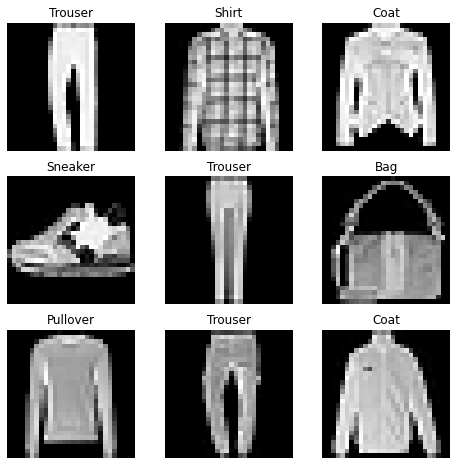

In [2]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Preparing your data for training with DataLoaders
-------------------------------------------------
The ``Dataset`` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to 
pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting, and use Python's multiprocessing to
speed up data retrieval.

In machine learning, you need to specify what the feature and label are in your dataset. **Features** are input and **labels** are output.  We train use features and train the model to predict the label.

  - Labels are what 10 class types:  T-shirt, Sandal, Dress etc
  - Features are the patterns in the images pixels

The ``DataLoader`` is an iterable that abstracts this complexity for us in an easy API.  We use the Dataloader, we need to set the following paraments:
 - **data** the training data that will be used to train the model; and test data to evaluate the model
 - **batch size** the number of records to be processed in each batch
 - **shuffle** the randoms sample of the data by indices


``Dataset`` 检索我们数据集的特征并一次标记一个样本。 在训练模型时，我们通常希望
在“小批量”中传递样本，在每个时期重新调整数据以减少模型过度拟合，并使用 Python 的多处理来
加快数据检索。

在机器学习中，您需要指定数据集中的特征和标签。 **特征**是输入，**标签**是输出。 我们训练使用特征并训练模型来预测标签。

   - 标签是什么 10 类类型：T 恤、凉鞋、连衣裙等
   - 特征是图像像素中的图案

``DataLoader`` 是一个可迭代对象，它在一个简单的 API 中为我们抽象了这种复杂性。 我们使用Dataloader，我们需要设置以下参数：
  - **data** 将用于训练模型的训练数据； 和测试数据来评估模型
  - **batch_size**每批处理的记录数
  - **shuffle** 按索引随机抽样数据

In [3]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

## Iterate through the DataLoader

We have loaded that dataset into the `Dataloader` and can iterate through the dataset as needed.
Each iteration below returns a batch of `train_features` and `train_labels`(containing `batch_size=64` features and labels respectively). Because we specified `shuffle=True`, after we iterate over all batches the data is shuffled (for finer-grained control over  the data loading order.

我们已将该数据集加载到``Dataloade``中，并可以根据需要迭代数据集。
下面的每次迭代都会返回一批``train_features``和``train_labels``（分别包含``batch_size=64``特征和标签）。 因为我们指定了 `shuffle=True`，所以在我们遍历所有批次之后，数据被打乱（为了更细粒度地控制数据加载顺序。

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


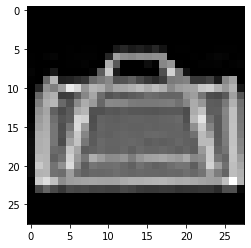

Label: 8


In [4]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Normalization

Normalization is a common data pre-processing technique that is applied to scale or transform the data to make sure there's an equal learning contribution from each feature.  For example, each pixel in the grayscale images have a value between 0 and 255, which are features.   If one pixel value is 17 and another pixel is 197. There will be an uneven distribution of the pixel importance, because the higher pixel volumes will deviate the learning. Normalization changes the range of your data, without distorting its distintion among out feature.  This pre-processing is to avoid:

- A reduction of the prediction accuracy 
- Difficulty for the model to learn
- Unfavorable distribution of the feature data ranges

归一化是一种常见的数据预处理技术，用于缩放或转换数据，以确保每个特征的学习贡献相等。 例如，灰度图像中的每个像素都有一个在0到255之间的值，这就是特征。  如果一个像素值是17，另一个像素是197。就会出现像素重要性的不均匀分布，因为较高的像素量会使学习发生偏差。归一化改变了你的数据的范围，而不扭曲其在特征中的区分度。 这种预处理是为了避免。

- 预测精度的降低 
- 模型学习的困难
- 不利于特征数据范围的分布

## Transforms

Data does not always come in its final processed form that is required for 
training machine learning algorithms. We use **transforms** to perform some
manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters (`transform` to modify the features and
`target_transform` to modify the labels) that accept callables containing the transformation logic. The `torchvision.transforms` module offers 
several commonly-used transforms out of the box.

The FashionMNIST features are in PIL Image format, and the labels are integers.
For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors.
To make these transformations, we use `ToTensor` and `Lambda`.

数据并不总是以训练机器学习算法所需的最终处理形式出现。
训练机器学习算法。我们使用**transforms**来对数据进行一些
对数据进行一些处理，使其适合训练。

所有的TorchVision数据集都有两个参数（``transform``用于修改特征和 ``target_transform``用于修改数据。
`target_transform`修改标签），接受包含转换逻辑的可调用参数。`torchvision.transform`模块提供了 
模块提供了几个常用的转换功能。

FashionMNIST的特征是PIL图像格式，标签是整数。
对于训练，我们需要将特征作为归一化的张量，将标签作为单热编码的张量。
为了进行这些转换，我们使用`ToTensor`和`Lambda`。

In [5]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## ToTensor()

`ToTensor` converts a PIL image or NumPy `ndarray` into a `FloatTensor` and scales the image's pixel intensity values in the range \[0., 1.\]

## Lambda transforms

Lambda transforms apply any user-defined lambda function. Here, we define a function 
to turn the integer into a one-hot encoded tensor. 
It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls scatter which assigns a 
_value=1_ on the index as given by the label _y_. You can also use `torch.nn.functional.one_hot` as another option to do that.


## ToTensor()

`ToTensor`将PIL图像或NumPy的`ndarray`转换为`FloatTensor`，并将图像的像素强度值在范围内进行缩放\[0., 1.\] 。

## Lambda变换

Lambda变换应用任何用户定义的lambda函数。在这里，我们定义了一个函数 
来把整数变成一个单热编码的张量。
它首先创建了一个大小为10（我们数据集中的标签数）的零张量，并调用scatter，在索引上分配一个 
在标签_y_给出的索引上分配一个_value=1_。你也可以使用`torch.nn.functional.one_hot`作为另一个选项来做这个。

In [6]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))